In [77]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [78]:
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv("/Users/austinthroop/Downloads/NFL_QB_Stats.csv")

In [80]:
top_qbs = ["Tom Brady", "Drew Brees", "Aaron Rodgers", "Peyton Manning"]

In [81]:
df = df[df["Player"].isin(top_qbs)]

In [82]:
df = df.sort_values(by=["Player", "Year"]) 
df["YearsInCareer"] = df.groupby("Player").cumcount()

In [83]:
plt.figure(figsize=(12, 6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

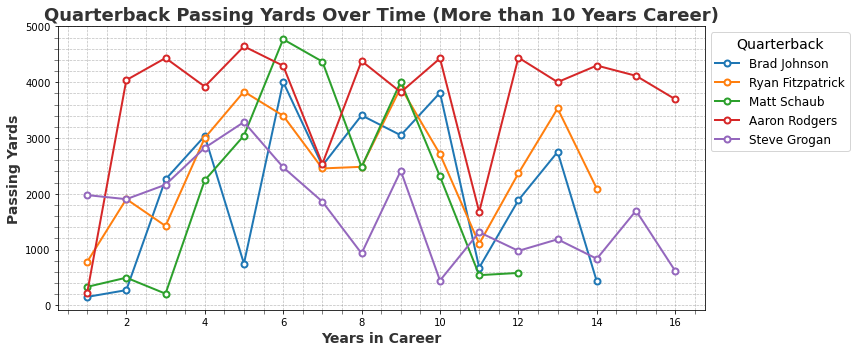

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import random


df = pd.read_csv("/Users/austinthroop/Downloads/NFL_QB_Stats.csv")


qb_career_lengths = df.groupby('Player').size()


qbs_more_than_10_years = qb_career_lengths[qb_career_lengths > 10].index


selected_qbs = random.sample(list(qbs_more_than_10_years), 5)


df_selected_qbs = df[df["Player"].isin(selected_qbs)]

df_selected_qbs = df_selected_qbs.sort_values(by=["Player", "Year"])  # Ensure correct order
df_selected_qbs["YearsInCareer"] = df_selected_qbs.groupby("Player").cumcount() + 1  # First year = 1

plt.figure(figsize=(12, 5))

line_styles = ['-','-','-','-','-']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, qb in enumerate(selected_qbs):
    qb_data = df_selected_qbs[df_selected_qbs["Player"] == qb]
    
    if not qb_data.empty: 
        plt.plot(qb_data["YearsInCareer"], qb_data["Pass Yds"], 
                 label=qb, 
                 linestyle=line_styles[i], 
                 color=colors[i], 
                 linewidth=2, 
                 marker='o', 
                 markersize=6, 
                 markerfacecolor='white', 
                 markeredgewidth=2)

plt.title("Quarterback Passing Yards Over Time (More than 10 Years Career)", fontsize=18, fontweight='bold', color='#333333')
plt.xlabel("Years in Career", fontsize=14, fontweight='bold', color='#333333')
plt.ylabel("Passing Yards", fontsize=14, fontweight='bold', color='#333333')

plt.legend(title="Quarterback", fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray', alpha=0.5)
plt.minorticks_on()
plt.tick_params(axis="both", which="minor", length=4, width=1, color='gray')

plt.tight_layout()
plt.show()


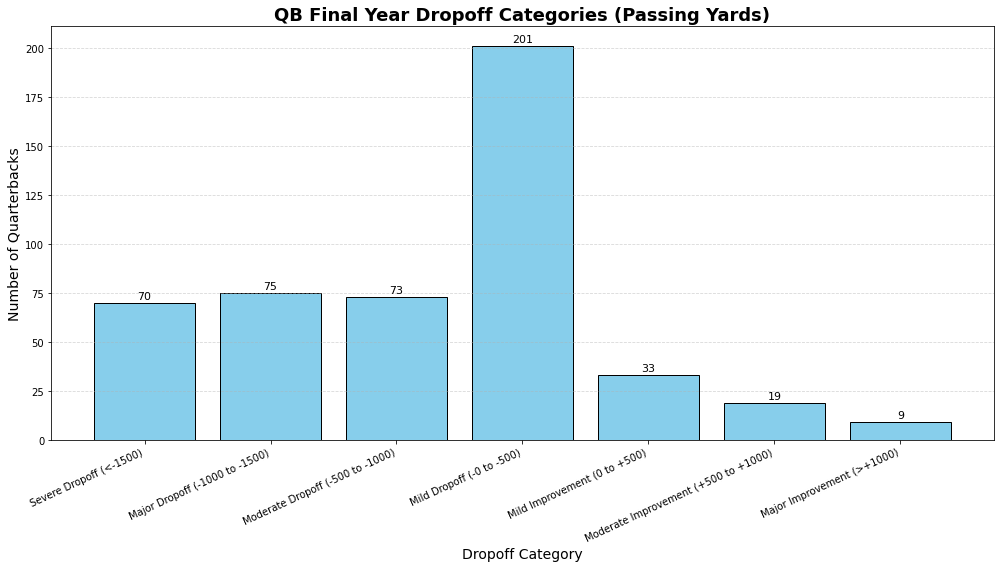

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/austinthroop/Downloads/NFL_QB_Stats.csv")
df = df.sort_values(by=["Player", "Year"])
df["YearsInCareer"] = df.groupby("Player").cumcount() + 1

dropoffs = []

for player, group in df.groupby("Player"):
    if len(group) < 2:
        continue  
    
    group = group.sort_values("Year")
    final_year_yards = group.iloc[-1]["Pass Yds"]
    avg_prior_yards = group.iloc[:-1]["Pass Yds"].mean()
    dropoff = final_year_yards - avg_prior_yards

    dropoffs.append(dropoff)

drop_df = pd.DataFrame({"Dropoff": dropoffs})

bin_edges = [-float('inf'), -1500, -1000, -500, 500, 1000, 1500, float('inf')]
bin_labels = [
    "Severe Dropoff (<-1500)",
    "Major Dropoff (-1000 to -1500)",
    "Moderate Dropoff (-500 to -1000)",
    "Mild Dropoff (-0 to -500)",
    "Mild Improvement (0 to +500)",
    "Moderate Improvement (+500 to +1000)",
    "Major Improvement (>+1000)"
]

drop_df["Dropoff Category"] = pd.cut(drop_df["Dropoff"], bins=bin_edges, labels=bin_labels)

category_counts = drop_df["Dropoff Category"].value_counts().sort_index()

plt.figure(figsize=(14, 8))
bars = plt.bar(category_counts.index, category_counts.values, color='skyblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, str(height),
             ha='center', va='bottom', fontsize=11)

plt.title("QB Final Year Dropoff Categories (Passing Yards)", fontsize=18, fontweight='bold')
plt.xlabel("Dropoff Category", fontsize=14)
plt.ylabel("Number of Quarterbacks", fontsize=14)
plt.xticks(rotation=25, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


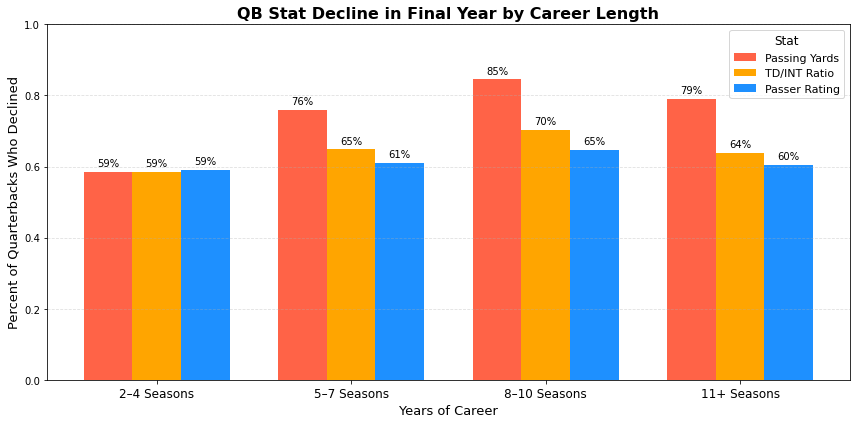

In [86]:
import matplotlib.pyplot as plt
import numpy as np

percent_declined = (
    combined.groupby(["Bucket", "Stat"])["Declined"].sum() /
    combined.groupby(["Bucket", "Stat"])[["Improved", "Declined"]].sum().sum(axis=1)
).reset_index(name="Percent Declined")

buckets = ["2–4 Seasons", "5–7 Seasons", "8–10 Seasons", "11+ Seasons"]
stats = ["Passing Yards", "TD/INT Ratio", "Passer Rating"]
colors = ["tomato", "orange", "dodgerblue"]

x = np.arange(len(buckets))
bar_width = 0.25

plt.figure(figsize=(12, 6))

for i, stat in enumerate(stats):
    values = percent_declined[percent_declined["Stat"] == stat].set_index("Bucket").loc[buckets]["Percent Declined"]
    plt.bar(x + i * bar_width - bar_width, values, width=bar_width, label=stat, color=colors[i])

    for j, val in enumerate(values):
        plt.text(x[j] + i * bar_width - bar_width, val + 0.01, f"{val:.0%}", ha='center', va='bottom', fontsize=10)

plt.xticks(x, buckets, fontsize=12)
plt.xlabel("Years of Career", fontsize=13)
plt.ylabel("Percent of Quarterbacks Who Declined", fontsize=13)
plt.title("QB Stat Decline in Final Year by Career Length", fontsize=16, fontweight='bold')
plt.legend(title="Stat", fontsize=11, title_fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

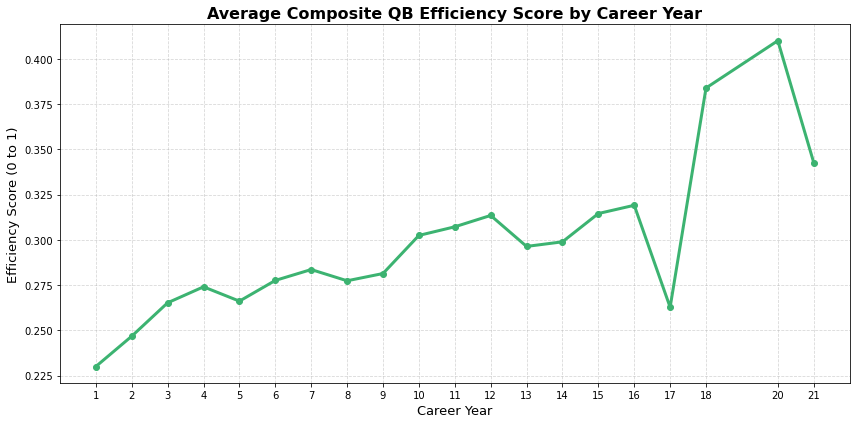

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("/Users/austinthroop/Downloads/NFL_QB_Stats.csv")
df = df.sort_values(by=["Player", "Year"])
df["YearsInCareer"] = df.groupby("Player").cumcount() + 1

df = df[(df["INT"] != 0) & df["Att"] > 0]

df["TD/INT"] = df["TD"] / df["INT"]

scaler = MinMaxScaler()
df[["Norm_YdsAtt", "Norm_TDINT", "Norm_Rate"]] = scaler.fit_transform(
    df[["Yds/Att", "TD/INT", "Rate"]]
)

df["Efficiency Score"] = df[["Norm_YdsAtt", "Norm_TDINT", "Norm_Rate"]].mean(axis=1)

avg_eff_by_year = df.groupby("YearsInCareer")["Efficiency Score"].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(avg_eff_by_year["YearsInCareer"], avg_eff_by_year["Efficiency Score"],
         marker='o', linewidth=3, color='mediumseagreen')

plt.title("Average Composite QB Efficiency Score by Career Year", fontsize=16, fontweight='bold')
plt.xlabel("Career Year", fontsize=13)
plt.ylabel("Efficiency Score (0 to 1)", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(avg_eff_by_year["YearsInCareer"])
plt.tight_layout()
plt.show()
